# Задание 1

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [10]:
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [53]:
X = pd.DataFrame(data, columns=feature_names)

In [54]:
y = pd.DataFrame(target, columns=["price"])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_names)

In [59]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=feature_names)

In [60]:
from sklearn.manifold import TSNE

In [61]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [62]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

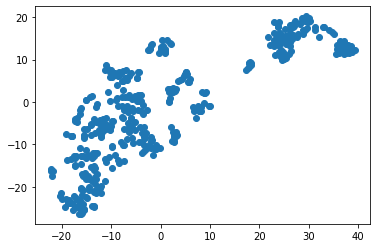

In [63]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

# Задание 2

In [64]:
from sklearn.cluster import KMeans

In [65]:
model = KMeans(n_clusters = 3, random_state = 42, max_iter = 100)

In [66]:
train_labels = model.fit_predict(X_train_tsne)

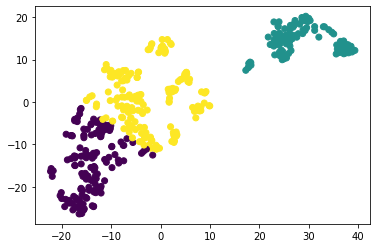

In [67]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = train_labels)
plt.show()

In [69]:
X_train_clusters = X_train.assign(cluster = train_labels)

In [95]:
def mean_by_cluster(df, feature, number_of_clusters):
    mean_by_cluster = {}
    for i in range(number_of_clusters):
        mean_by_cluster[i] = df.loc[df['cluster'] == i, feature].mean()
    return mean_by_cluster

In [96]:
mean_by_cluster(X_train_clusters, 'CRIM', 3)

{0: 0.09462279411764711, 1: 13.17982178217822, 2: 0.6829679640718564}

In [79]:
y_train_clusters = y_train.assign(cluster = train_labels)

In [97]:
mean_by_cluster(y_train_clusters, 'price', 3)

{0: 26.564705882352936, 1: 16.277227722772285, 2: 23.67065868263472}

# Задание 3

In [86]:
test_labels = model.fit_predict(X_test_scaled)

In [88]:
X_test_clusters = X_test.assign(cluster = test_labels)

In [98]:
mean_by_cluster(X_test_clusters, 'CRIM', 3)

{0: 9.419181842105264, 1: 0.21929690909090907, 2: 0.04070333333333334}

In [100]:
y_test_clusters = y_test.assign(cluster = test_labels)

In [101]:
mean_by_cluster(y_test_clusters, 'price', 3)

{0: 16.710526315789473, 1: 22.6909090909091, 2: 34.3111111111111}